## Text Mining exam

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Question 4

In [10]:
url= 'https://bit.ly/2S2yXEd'

imdb= pd.read_csv(url)

In [11]:
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [18]:
word= imdb['review']

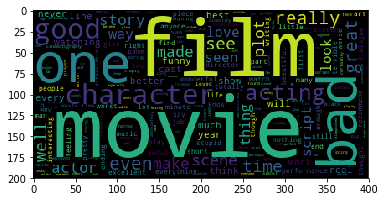

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud().generate(''.join(imdb['review']))
plt.imshow(wc)

In [ ]:
## the words with large size have occured the most no. of times 

In [12]:
docs= imdb['review'].fillna('').str.lower().str.replace('[^a-z #@]', '')
stopwords= nltk.corpus.stopwords.words('english')
stemmer= nltk.stem.PorterStemmer()

def clean_sentence(text):
    return' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stopwords])
docs_clean=docs.apply(clean_sentence)

#docs_clean.head()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=5)

train, test= train_test_split(docs_clean, test_size= 0.2, random_state=100)
vectorizer.fit(train)
train_dtm=vectorizer.transform(train)
test_dtm=vectorizer.transform(test)

train_x= pd.DataFrame(train_dtm.toarray(), columns= vectorizer.get_feature_names())
test_x= pd.DataFrame(test_dtm.toarray(), columns= vectorizer.get_feature_names())

train_x.shape, test_x.shape

((598, 240), (150, 240))

In [14]:
train_y= imdb.iloc[train.index]['sentiment']

test_y= imdb.iloc[test.index]['sentiment']

In [15]:
imdb['sentiment'].value_counts()/imdb.shape[0]*100

1    51.604278
0    48.395722
Name: sentiment, dtype: float64

In [16]:
model1= MultinomialNB()

model1.fit(train_x, train_y)

predict_classes1=model1.predict(test_x)

accuracy_score(test_y,predict_classes1)

0.76

In [17]:
model2= GaussianNB()

model2.fit(train_x, train_y)

predict_classes2=model2.predict(test_x)

accuracy_score(test_y,predict_classes2)

0.6266666666666667

## Question 5

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti= SentimentIntensityAnalyzer()

In [53]:
imdb['sentiment_vader']=imdb['review'].apply(lambda v: senti.polarity_scores(v)['compound'])

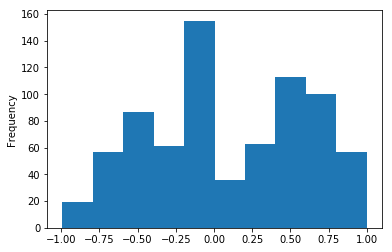

In [54]:
imdb['sentiment_vader'].plot.hist()

In [58]:
def assign_sentiment(score):
    if score > 0:
        return 1
    else:
        return 0
imdb['sentiment_vader']=imdb['review'].apply(lambda v: senti.polarity_scores(v)['compound'])
imdb['sentiment_vader']=imdb['sentiment_vader'].apply(assign_sentiment)
imdb['sentiment_vader'].value_counts()

0    378
1    370
Name: sentiment_vader, dtype: int64

In [56]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

In [59]:
accuracy_score(imdb['sentiment'], imdb['sentiment_vader'])

0.7941176470588235

Hence, we can see we are getting much better accuracy using Vader ie, 79.4%

## Question 6

In [63]:
!pip install gensim

  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\ASUS\AppData\Local\pip\Cache\wheels\f7\a6\ff\9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Running setup.py bdist_wheel for bz2file: started
  Running setup.py bdist_wheel for bz2file: finished with status 'done'
  Stored in directory: C:\Users\ASUS\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [64]:
import gensim


In [71]:
abc= pd.read_csv("abcnews.csv")

In [66]:
abc.shape

(1103665, 2)

In [67]:
abc.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [72]:
df1 = abc.sample(n= 10000, random_state=1)

In [73]:
df1.head()

,publish_date,headline_text
300136,20070424,proteas take aim at aussie top order
810615,20130812,toxic sands clean up on track
198535,20051104,botmaster arrested over computer spam network
1065916,20170219,what its like to live with face blindness
964396,20150703,strangers help westlake family recover from de...


In [89]:
docs = df1['headline_text'].fillna('').str.lower().replace('[^a-z ]', '')
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
def clean_sentence(text):
    return [stemmer.stem(word) for word in text.split(' ') if word not in stopwords]
docs_clean = docs.apply(clean_sentence)

In [90]:
docs_clean.head()

300136                [protea, take, aim, aussi, top, order]
810615                           [toxic, sand, clean, track]
198535              [botmast, arrest, comput, spam, network]
1065916                            [like, live, face, blind]
964396     [stranger, help, westlak, famili, recov, deadl...
Name: headline_text, dtype: object

In [91]:
dictionary = gensim.corpora.Dictionary(docs_clean)
len([(key, value) for key, value in dictionary.items()])

9495

In [92]:
docs_bows = []
for doc in docs_clean:
    bow = dictionary.doc2bow(doc)
    docs_bows.append(bow)
print(docs_bows[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [93]:

model = gensim.models.LdaModel(docs_bows, id2word=dictionary, num_topics=6)
model

In [94]:

print(model.get_document_topics(docs_bows[0]))
print(model.get_document_topics(docs_bows[1]))
print(model.get_document_topics(docs_bows[2]))
print(model.get_document_topics(docs_bows[3]))
print(model.get_document_topics(docs_bows[4]))
print(model.get_document_topics(docs_bows[5]))

[(0, 0.20604034), (1, 0.023862336), (2, 0.023880556), (3, 0.69755685), (4, 0.024582047), (5, 0.024077863)]
[(0, 0.03336252), (1, 0.033421114), (2, 0.033348672), (3, 0.83262604), (4, 0.03363881), (5, 0.03360282)]
[(0, 0.027946355), (1, 0.8602292), (2, 0.027966447), (3, 0.027945617), (4, 0.027944095), (5, 0.0279683)]
[(0, 0.033696108), (1, 0.033443008), (2, 0.033825684), (3, 0.03337917), (4, 0.03365958), (5, 0.8319964)]
[(0, 0.018597074), (1, 0.018636545), (2, 0.018632306), (3, 0.906832), (4, 0.018650452), (5, 0.018651607)]
[(0, 0.02404495), (1, 0.87931997), (2, 0.024052536), (3, 0.024323488), (4, 0.024142088), (5, 0.024116974)]


In [95]:
model.print_topics()


[(0,
  '0.008*"win" + 0.007*"farmer" + 0.005*"battl" + 0.004*"death" + 0.004*"job" + 0.004*"guilti" + 0.004*"could" + 0.004*"rate" + 0.004*"smith" + 0.004*"found"'),
 (1,
  '0.007*"health" + 0.007*"nsw" + 0.006*"fire" + 0.006*"mp" + 0.006*"water" + 0.006*"ban" + 0.005*"call" + 0.004*"arrest" + 0.004*"test" + 0.004*"one"'),
 (2,
  '0.009*"new" + 0.008*"face" + 0.005*"say" + 0.005*"us" + 0.004*"case" + 0.004*"abus" + 0.004*"fight" + 0.004*"minist" + 0.004*"team" + 0.004*"countri"'),
 (3,
  '0.011*"new" + 0.011*"interview" + 0.008*"govt" + 0.008*"take" + 0.006*"say" + 0.006*"hous" + 0.006*"lead" + 0.005*"council" + 0.005*"call" + 0.005*"power"'),
 (4,
  '0.012*"man" + 0.009*"charg" + 0.008*"crash" + 0.006*"court" + 0.005*"make" + 0.005*"murder" + 0.005*"cup" + 0.005*"jail" + 0.005*"die" + 0.004*"car"'),
 (5,
  '0.023*"polic" + 0.007*"man" + 0.007*"kill" + 0.007*"attack" + 0.006*"centr" + 0.006*"warn" + 0.005*"charg" + 0.005*"death" + 0.005*"accus" + 0.005*"council"')]

In [96]:

stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords = ['', 'Police','dead', 'Murder','terrorist']
stopwords.extend(custom_stopwords)

In [97]:
stemmer = nltk.stem.PorterStemmer()
def clean_sentence(text):
    return [stemmer.stem(word) for word in text.split(' ') if word not in stopwords]
docs_clean = docs.apply(clean_sentence)

In [98]:
dictionary = gensim.corpora.Dictionary(docs_clean)


In [99]:
docs_bows = []
for doc in docs_clean:
    bow = dictionary.doc2bow(doc)
    docs_bows.append(bow)

In [100]:
model = gensim.models.LdaModel(docs_bows, id2word=dictionary, num_topics=6)

model.print_topics()
# So we have to iterate to see the optimal no. of topics


[(0,
  '0.012*"polic" + 0.012*"man" + 0.010*"new" + 0.008*"kill" + 0.007*"crash" + 0.007*"fire" + 0.007*"claim" + 0.006*"wa" + 0.006*"car" + 0.006*"attack"'),
 (1,
  '0.007*"australian" + 0.007*"price" + 0.007*"rise" + 0.007*"coast" + 0.006*"make" + 0.005*"gold" + 0.005*"jail" + 0.004*"man" + 0.004*"sale" + 0.004*"gillard"'),
 (2,
  '0.010*"win" + 0.009*"market" + 0.007*"take" + 0.007*"fire" + 0.005*"test" + 0.005*"delay" + 0.005*"melbourn" + 0.005*"share" + 0.004*"cup" + 0.004*"lead"'),
 (3,
  '0.011*"court" + 0.008*"polic" + 0.007*"say" + 0.007*"man" + 0.007*"govt" + 0.006*"consid" + 0.006*"charg" + 0.005*"plan" + 0.005*"water" + 0.005*"face"'),
 (4,
  '0.006*"polic" + 0.006*"man" + 0.006*"arrest" + 0.005*"accus" + 0.005*"death" + 0.005*"case" + 0.005*"farmer" + 0.005*"forc" + 0.005*"countri" + 0.005*"rain"'),
 (5,
  '0.008*"interview" + 0.007*"back" + 0.007*"new" + 0.007*"council" + 0.006*"open" + 0.005*"nsw" + 0.005*"call" + 0.005*"want" + 0.005*"us" + 0.004*"polic"')]

In [101]:
topics = []
for doc in docs_bows:
    df_topic_word = pd.DataFrame(model.get_document_topics(doc), columns=['topic','prob'])
    curr_topic = df_topic_word.sort_values('prob', ascending=False).iloc[0]['topic']
    topics.append(curr_topic)



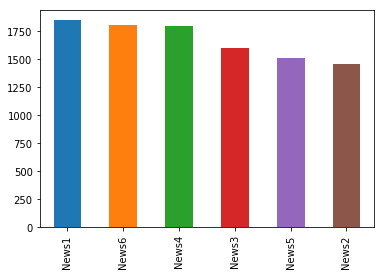

In [104]:
df1['Topics'] = topics
df1['Topics'] = df1['Topics'].replace({0:'News1',1:'News2',
                                                     2:'News3',3:'News4',4:'News5',5:'News6'})
df1['Topics'].value_counts().plot.bar()

In [167]:
model1 = gensim.models.LdaModel(docs_bows, id2word=dictionary, num_topics=7)
model1

In [169]:

print(model1.get_document_topics(docs_bows[0]))
print(model1.get_document_topics(docs_bows[1]))
print(model1.get_document_topics(docs_bows[2]))
print(model1.get_document_topics(docs_bows[3]))
print(model1.get_document_topics(docs_bows[4]))
print(model1.get_document_topics(docs_bows[5]))
print(model1.get_document_topics(docs_bows[6]))

[(0, 0.020431424), (1, 0.02052245), (2, 0.13555792), (3, 0.020422818), (4, 0.02048373), (5, 0.020421173), (6, 0.7621605)]
[(0, 0.028583204), (1, 0.02860094), (2, 0.55566996), (3, 0.028675867), (4, 0.028583195), (5, 0.30121264), (6, 0.028674187)]
[(0, 0.7254086), (1, 0.023986949), (2, 0.024007162), (3, 0.023979194), (4, 0.023985872), (5, 0.15454406), (6, 0.024088152)]
[(0, 0.028681524), (1, 0.028727025), (2, 0.028830064), (3, 0.24504997), (4, 0.028724845), (5, 0.2823), (6, 0.35768658)]
[(0, 0.015995413), (1, 0.015967801), (2, 0.016002174), (3, 0.01594692), (4, 0.015967635), (5, 0.015955051), (6, 0.90416497)]
[(0, 0.020725835), (1, 0.74327415), (2, 0.020821612), (3, 0.02061232), (4, 0.020621743), (5, 0.15327431), (6, 0.020670004)]
[(0, 0.02885601), (1, 0.028878128), (2, 0.6306672), (3, 0.02887084), (4, 0.22501811), (5, 0.028854966), (6, 0.028854713)]


In [171]:
model1.print_topics()


[(0,
  '0.007*"fire" + 0.007*"union" + 0.006*"hope" + 0.006*"say" + 0.006*"charg" + 0.005*"rate" + 0.005*"group" + 0.005*"abus" + 0.005*"could" + 0.005*"high"'),
 (1,
  '0.015*"interview" + 0.007*"sex" + 0.006*"decis" + 0.005*"leader" + 0.005*"flood" + 0.005*"south" + 0.005*"child" + 0.005*"win" + 0.004*"news" + 0.004*"abc"'),
 (2,
  '0.015*"new" + 0.010*"plan" + 0.010*"govt" + 0.008*"water" + 0.007*"support" + 0.007*"fire" + 0.007*"boost" + 0.006*"green" + 0.006*"test" + 0.006*"get"'),
 (3,
  '0.009*"talk" + 0.009*"farmer" + 0.008*"elect" + 0.008*"us" + 0.007*"back" + 0.006*"iraq" + 0.006*"interview" + 0.006*"chief" + 0.006*"chang" + 0.005*"make"'),
 (4,
  '0.007*"death" + 0.006*"case" + 0.006*"new" + 0.006*"found" + 0.006*"vote" + 0.006*"strike" + 0.005*"leav" + 0.005*"us" + 0.005*"wa" + 0.005*"tour"'),
 (5,
  '0.010*"council" + 0.007*"lead" + 0.007*"push" + 0.007*"public" + 0.006*"continu" + 0.006*"told" + 0.006*"rural" + 0.005*"nation" + 0.005*"market" + 0.005*"fund"'),
 (6,
  '0.0

In [173]:
topics = []
for doc in docs_bows:
    df_topic_word = pd.DataFrame(model1.get_document_topics(doc), columns=['topic','prob'])
    curr_topic = df_topic_word.sort_values('prob', ascending=False).iloc[0]['topic']
    topics.append(curr_topic)

In [174]:

stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords = ['', 'army','death', 'Murder','poltics', 'fire', 'war']
stopwords.extend(custom_stopwords)

In [175]:
stemmer = nltk.stem.PorterStemmer()
def clean_sentence(text):
    return [stemmer.stem(word) for word in text.split(' ') if word not in stopwords]
docs_clean = docs.apply(clean_sentence)

In [176]:
dictionary = gensim.corpora.Dictionary(docs_clean)


In [177]:

docs_bows = []
for doc in docs_clean:
    bow = dictionary.doc2bow(doc)
    docs_bows.append(bow)

In [178]:

model1 = gensim.models.LdaModel(docs_bows, id2word=dictionary, num_topics=6)

model1.print_topics()
# So we have to iterate to see the optimal no. of topics

[(0,
  '0.061*"phone" + 0.014*"product" + 0.014*"great" + 0.013*"servic" + 0.011*"ive" + 0.011*"work" + 0.009*"buy" + 0.009*"charg" + 0.009*"new" + 0.008*"good"'),
 (1,
  '0.031*"phone" + 0.023*"work" + 0.019*"item" + 0.016*"good" + 0.015*"product" + 0.013*"happi" + 0.011*"great" + 0.009*"two" + 0.009*"would" + 0.009*"problem"'),
 (2,
  '0.025*"work" + 0.021*"phone" + 0.018*"batteri" + 0.017*"headset" + 0.017*"great" + 0.015*"ear" + 0.012*"disappoint" + 0.011*"wast" + 0.010*"also" + 0.009*"time"'),
 (3,
  '0.020*"work" + 0.018*"use" + 0.018*"great" + 0.018*"good" + 0.016*"case" + 0.015*"phone" + 0.013*"one" + 0.012*"get" + 0.011*"price" + 0.008*"headset"'),
 (4,
  '0.022*"use" + 0.019*"phone" + 0.016*"make" + 0.012*"dont" + 0.012*"ear" + 0.010*"get" + 0.009*"headset" + 0.009*"would" + 0.009*"sound" + 0.009*"buy"'),
 (5,
  '0.028*"great" + 0.021*"work" + 0.021*"qualiti" + 0.018*"sound" + 0.014*"product" + 0.014*"excel" + 0.014*"well" + 0.013*"phone" + 0.012*"batteri" + 0.012*"use"')]

In [184]:
topics = []
for doc in docs_bows:
    df_topic_word = pd.DataFrame(model1.get_document_topics(doc), columns=['topic','prob'])
    curr_topic = df_topic_word.sort_values('prob', ascending=False).iloc[0]['topic']
    topics.append(curr_topic)

## Question 1

In [87]:
!pip install selenium

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [88]:
from selenium import webdriver
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns

In [107]:
url="https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b"
browser=webdriver.Chrome('chromedriver.exe')
browser.get(url)

In [108]:
para_tags=browser.find_elements_by_css_selector('p')
for para in para_tags:
    print (para.text)

Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way.
Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded.
Today I’m going to share with you all of the interview questions I was asked and how to approach them. Many of the questions were quite common and expected theory, but man

In [109]:
text=' '.join([para.text for para in para_tags])
text

'Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way. Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded. Today I’m going to share with you all of the interview questions I was asked and how to approach them. Many of the questions were quite common and expected theory, but ma

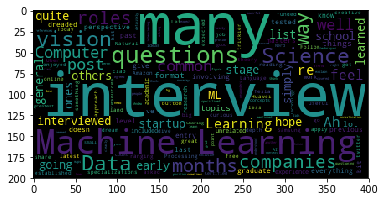

In [110]:

wc=WordCloud().generate(text)
plt.imshow(wc)

## Question2

In [113]:
amazon=pd.read_csv('sentiment_amazon (1).csv')
amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [114]:
docs=amazon['review'].fillna('').str.lower().str.replace('[^a-z ]', '')
stopwords=nltk.corpus.stopwords.words('english')
stemmer=nltk.stem.PorterStemmer()
def clean_sentence(text):
    return' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stopwords])
docs_clean=docs.apply(clean_sentence)

In [115]:
docs_clean.head()

0                     way plug us unless go convert
1                                      great jawbon
2    tie charger convers last  minutesmajor problem
3                                         mic great
4        jiggl plug get line right get decent volum
Name: review, dtype: object

In [116]:
vectorizer=CountVectorizer(min_df=25)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=25,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [117]:
vectorizer.fit(docs_clean)

dtm_sparse=vectorizer.transform(docs_clean)
df_dtm=pd.DataFrame(dtm_sparse.toarray(), columns=vectorizer.get_feature_names())
df_dtm.head()

,batteri,ear,good,great,headset,one,phone,product,qualiti,sound,use,work
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
cos_matrix=cosine_similarity(df_dtm.T)
cos_matrix

array([[1.        , 0.        , 0.04796011, 0.05980892, 0.02632491,
        0.        , 0.08489527, 0.        , 0.        , 0.        ,
        0.07271792, 0.05446449],
       [0.        , 1.        , 0.02250746, 0.01871203, 0.09883324,
        0.11461365, 0.02656064, 0.07142857, 0.        , 0.14580296,
        0.04550158, 0.01703995],
       [0.04796011, 0.02250746, 1.        , 0.        , 0.02335709,
        0.        , 0.05021624, 0.06752237, 0.20958501, 0.05513178,
        0.        , 0.06443237],
       [0.05980892, 0.01871203, 0.        , 1.        , 0.01941839,
        0.02251887, 0.16699314, 0.11227218, 0.02178034, 0.06875239,
        0.03575993, 0.26783579],
       [0.02632491, 0.09883324, 0.02335709, 0.01941839, 1.        ,
        0.02973505, 0.01378164, 0.        , 0.0862796 , 0.12104551,
        0.14165765, 0.05304959],
       [0.        , 0.11461365, 0.        , 0.02251887, 0.02973505,
        1.        , 0.07991055, 0.02865341, 0.06670373, 0.03509312,
        0.05475857,

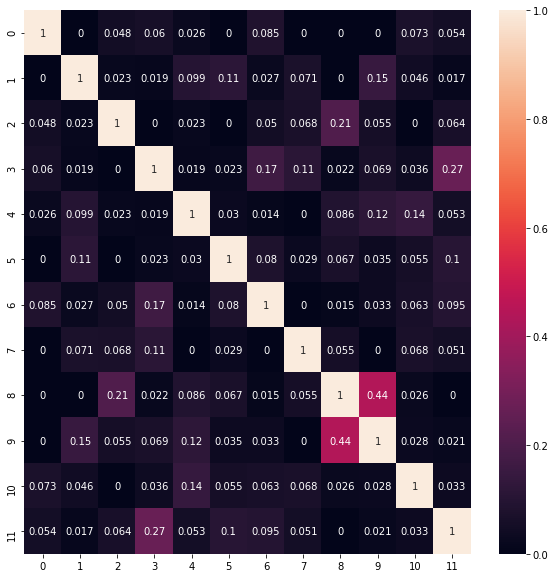

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_matrix, annot=True)

In [123]:
cos_matrix.max()

1.0000000000000002

## Question 3

In [130]:
from sklearn.cluster import KMeans


In [132]:
df_dtm.shape

(771, 12)

In [134]:
model_cluster = KMeans(n_clusters=4, max_iter=50)
model_cluster.fit(df_dtm.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [135]:
amazon.index = pd.RangeIndex(len(amazon.index))


In [136]:
amazon.columns

Index(['review', 'sentiment'], dtype='object')

In [137]:
amazon_cluster = pd.concat([amazon, pd.Series(model_cluster.labels_)], axis=1)
amazon_cluster.columns =['review', 'sentiment', 'cluster_id']

In [138]:
group = amazon_cluster.groupby('cluster_id')
g1 = group.get_group(0)
g2 = group.get_group(1)
g3 = group.get_group(2)
g4 = group.get_group(3)

In [141]:
len(g1) , len(g2),len(g3), len(g4)

(2, 1, 2, 7)

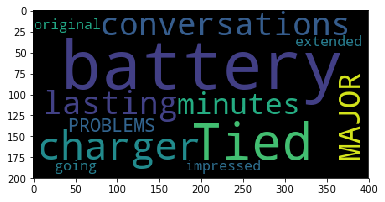

In [153]:
wc=WordCloud().generate(''.join(g1['review']))
plt.imshow(wc)

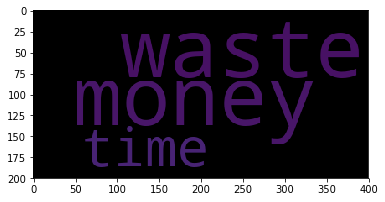

In [154]:
wc=WordCloud().generate(''.join(g2['review']))
plt.imshow(wc)

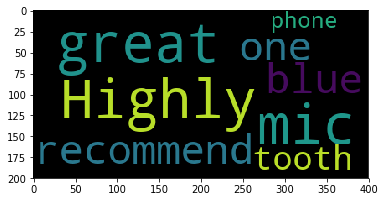

In [155]:
wc=WordCloud().generate(''.join(g3['review']))
plt.imshow(wc)

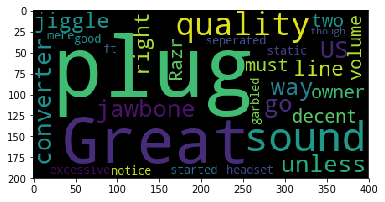

In [156]:
wc=WordCloud().generate(''.join(g4['review']))
plt.imshow(wc)

In [ ]:
len(g1) , len(g2),len(g3), len(g4)

In [159]:
l = {'No. of Documents': [len(g1) , len(g2),len(g3), len(g4)]}


df_bar= pd.DataFrame(l)

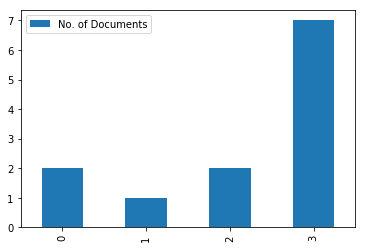

In [166]:
df_bar.plot(kind='bar')


cluster g4 has the highest no. of documents